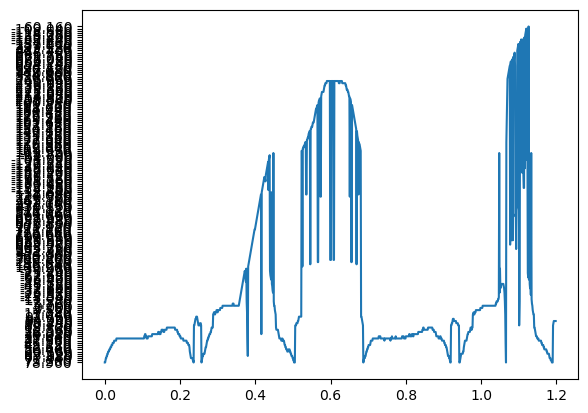

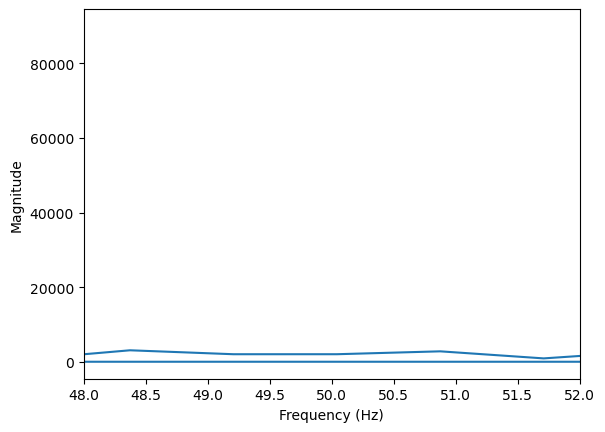

[90044.48+0.j]


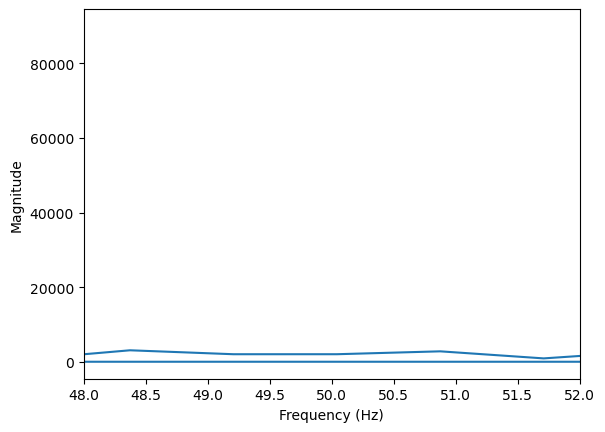

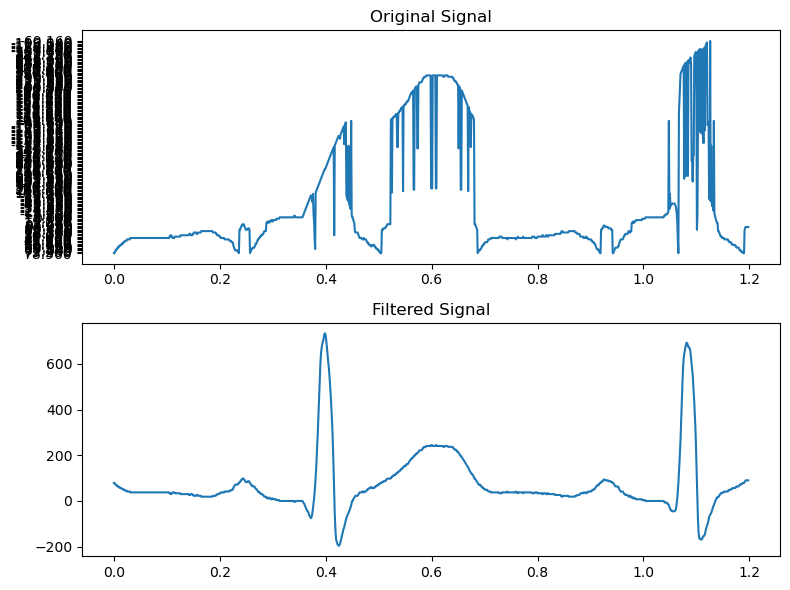

In [1]:
import pandas as pd
import numpy as np
Fs = 1000  # sampling rate
# Read the signal from the CSV file
df = pd.read_csv('samples.csv')
signal = df["'I'"][1:-1].values
################signal=signal/1000000
# Plot the signal
t = np.arange(0, 1.199, 1/Fs)  # time vector
import matplotlib.pyplot as plt
plt.plot(t,signal)
plt.show()

############



# Generate a signal with a 50 Hz component


f = 50  # frequency of the 50 Hz component
#signal = 5*np.sin(2*np.pi*f*t) + 2*np.random.randn(len(t))

# Take the DFT of the signal
freq = np.fft.fftfreq(len(signal), 1/Fs)  # frequency bins
fft = np.fft.fft(signal)  # DFT coefficients


# Plot the Fourier transform
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(48,52)
plt.show()
# Apply a low-pass filter by setting the 50 Hz component to zero
print(fft[np.abs(freq) ==0])
#fft[np.abs(freq) ==f] = 0
#fft[np.abs(freq)<=0.7]=0
fft[((np.abs(freq) >49)&(np.abs(freq) <51)).all()] = 0
#print(np.where(freq==50))
#fft[np.where(freq==50)[0]]=0

plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(48,52)
plt.show()
# Take the IFT of the filtered signal
filtered_signal = np.fft.ifft(fft).real  # real part of the IFT

# Plot the original and filtered signals
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(t, signal)
ax[0].set_title('Original Signal')
ax[1].plot(t, filtered_signal)
ax[1].set_title('Filtered Signal')
plt.tight_layout()
plt.show()


<class 'numpy.ndarray'>


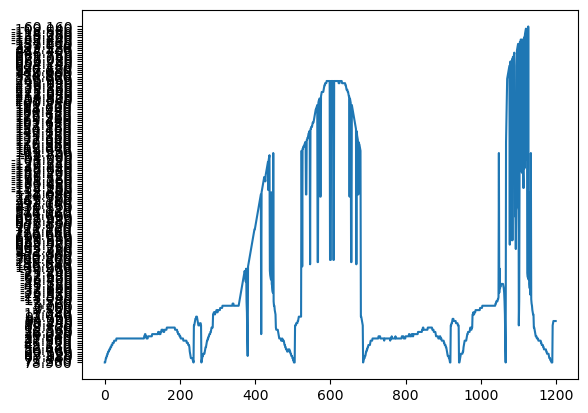

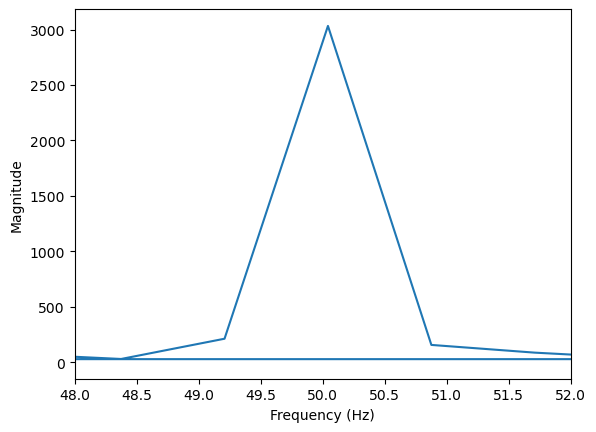

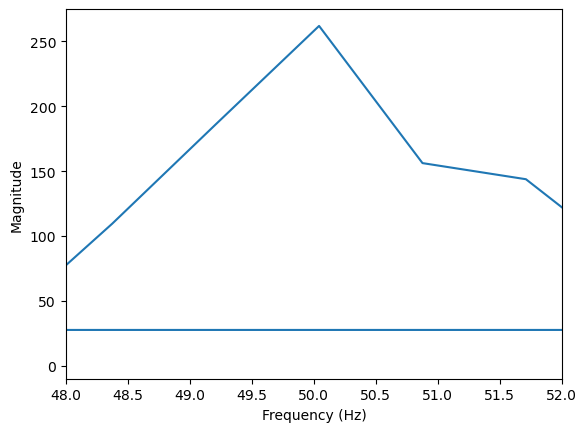

In [2]:
from scipy import signal
import pandas as pd
import numpy as np

# Read the signal from the CSV file
df = pd.read_csv('samples.csv')
#signal1 = df["'I'"][1:].values
signal1 = df["'I'"][1:].to_numpy()
################signal=signal/1000000
# Plot the signal
print(type(signal1))
import matplotlib.pyplot as plt
plt.plot(signal1)
plt.show()

############



# Generate a signal with a 50 Hz component
Fs = 1000  # sampling rate
t = np.arange(0, 1.199, 1/Fs)  # time vector
f = 50  # frequency of the 50 Hz component
signal1 = 5*np.sin(2*np.pi*f*t) + 2*np.random.randn(len(t))

# Take the DFT of the signal
freq = np.fft.fftfreq(len(signal1), 1/Fs)  # frequency bins
fft = np.fft.fft(signal1)  # DFT coefficients


# Plot the Fourier transform
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(48,52)
plt.show()

Q = 30  # notch quality factor
w0 = f / (Fs/2)  # normalized notch frequency
b, a = signal.iirnotch(w0, Q)

# Apply the notch filter to the signal
filtered_signal = signal.filtfilt(b, a,signal1)

# Compute the Fourier transform of the filtered signal
freq = np.fft.fftfreq(len(filtered_signal), 1/Fs)  # frequency bins
fft = np.fft.fft(filtered_signal)  # DFT coefficients

# Plot the Fourier transform
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(48,52)
plt.show()

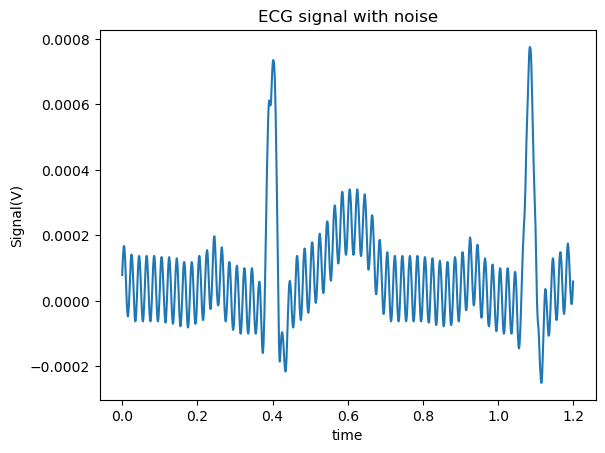

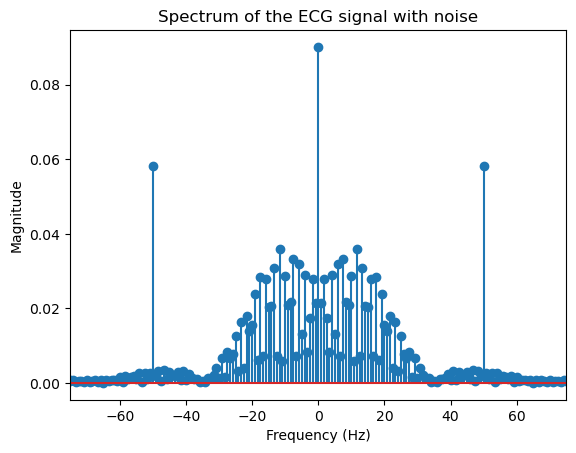

[ 1.         -1.80700738  0.9025    ]
[ 0.97553966 -1.8555867   0.97553966]
0.9755396613681641


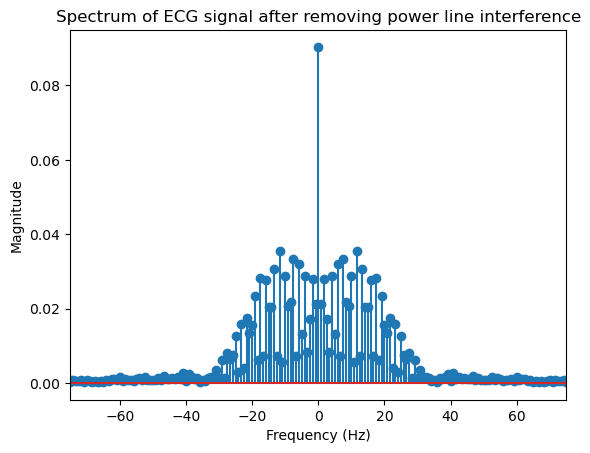

[ 1.         -0.99560177]
[ 0.99780089 -0.99780089]
0.9978008851424871


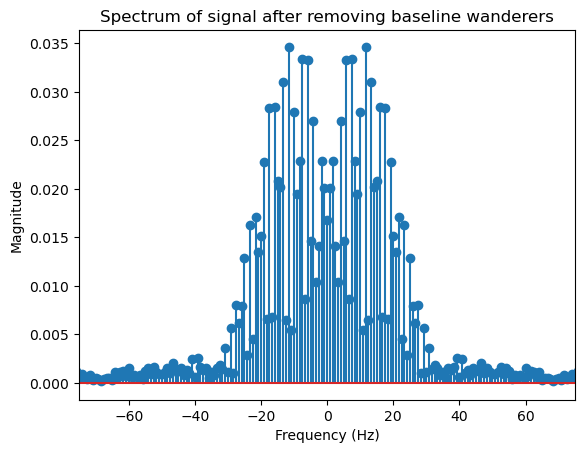

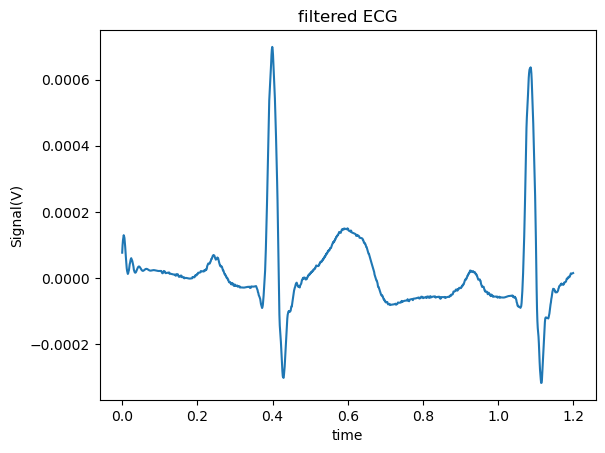

In [3]:
#using digital filters final

from scipy import signal
import pandas as pd
import numpy as np

Fs = 1000  # sampling rate
t = np.arange(0, 1.2, 1/Fs)  # time vector
f = 50  # frequency of the 50 Hz component

# Read the signal from the CSV file
df = pd.read_csv('samples.csv')
#signal1 = df["'I'"][1:].values
signal1 = df["'I'"][1:].to_numpy()#set the coumn to be read from the CSV
signal1 = signal1.astype(np.float64)
signal1=signal1/1000000  #convert to microvolts
signal1 = np.add(signal1 , 1*10**(-4)*np.sin(2*np.pi*f*t))

# Plot the signal
import matplotlib.pyplot as plt
plt.plot(t,signal1)
plt.ylabel("Signal(V)")
plt.xlabel("time")
plt.title("ECG signal with noise")
plt.show()

#signal1 = 5*np.sin(2*np.pi*f*t) +5*np.sin(2*np.pi*0.1*t)+ 2*np.random.randn(len(t))

# Take the DFT of the signal
freq = np.fft.fftfreq(len(signal1), 1/Fs)  # frequency bins
fft = np.fft.fft(signal1)  # DFT coefficients


# Plot the Fourier transform
plt.stem(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of the ECG signal with noise")
plt.xlim(-75,75)
plt.show()

#filtering out 50Hz signal(powerline interference)
r = 0.95
theta = np.pi*2*f/Fs
K=(1-2*r*np.cos(theta)+r*r)/(2-2*np.cos(theta))
b1=np.array([1,-2*np.cos(theta),1])
b1=b1*K
a1=np.array([1,-2*0.95*np.cos(theta),r*r])
print(a1)
print(b1)
print(K)
y1=signal.lfilter(b1,a1,signal1)

# Take the DFT of the signal
freq1 = np.fft.fftfreq(len(y1), 1/Fs)  # frequency bins
fft1 = np.fft.fft(y1)  # DFT coefficients
# Plot the Fourier transform
plt.stem(freq1, np.abs(fft1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of ECG signal after removing power line interference")
plt.xlim(-75,75)
plt.show()

#filtering baseline wanderers using a highpass filter
alpha = 1 - 2*0.7*np.pi/Fs
K = (1+alpha)/2
b2 = np.array([1,-1])
b2 = K*b2
a2 = np.array([1,-1*alpha])
y2=signal.lfilter(b2,a2,y1)
print(a2)
print(b2)
print(K)
# Take the DFT of the signal
freq2 = np.fft.fftfreq(len(y2), 1/Fs)  # frequency bins
fft2 = np.fft.fft(y2)  # DFT coefficients
# Plot the Fourier transform
plt.stem(freq2, np.abs(fft2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of signal after removing baseline wanderers")
plt.xlim(-75,75)
plt.show()

#plotting the filtered signal
plt.plot(t,y2)
plt.xlabel("time")
plt.ylabel("Signal(V)")
plt.title("filtered ECG")
plt.show()



In [4]:
#gui final
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np

def create_plot(fig, position, title, data,xaxis,xlabel,ylabel,xlim):
    ax = fig.add_subplot(position)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim[0],xlim[1])
    if(xlabel=="Frequency(Hz)"):
        ax.stem(xaxis,data)
    else:
        ax.plot(xaxis,data)

def guifunc():
    # Create the main window
    root = tk.Tk()
    root.title("Matplotlib Plots in Tkinter")

    # Create a tab control for the plots
    tab_control = ttk.Notebook(root)
    tab_control.pack(expand=1, fill="both")

    # Generate sample data for the plots

    # Create the plots
    for i, (title, data,xaxis,xlabel,ylabel,xlim) in enumerate(zip(["corrupted signal", "spectrum of corrupted signal", "Spectrum of ECG signal after removing power line interference", "Spectrum of signal after removing baseline wanderers", "Filtered signal"], [signal1, np.abs(fft), np.abs(fft1), np.abs(fft2), y2],[t,freq,freq1,freq2,t],["time(s)","Frequency(Hz)","Frequency(Hz)","Frequency(Hz)","time(s)"],["Signal(V)","Magnitude","Magnitude","Magnitude","Signal(V)"],[[0,1.2],[-75,75],[-75,75],[-75,75],[0,1.2]])):
        fig = Figure(figsize=(5, 5), dpi=100)
        create_plot(fig, 111, title, data,xaxis,xlabel,ylabel,xlim)

        # Create a new tab for the plot
        tab = ttk.Frame(tab_control)
        tab_control.add(tab, text=title)

        # Add the plot to the tab
        canvas = FigureCanvasTkAgg(fig, master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Start the main loop
    root.mainloop()


guifunc()

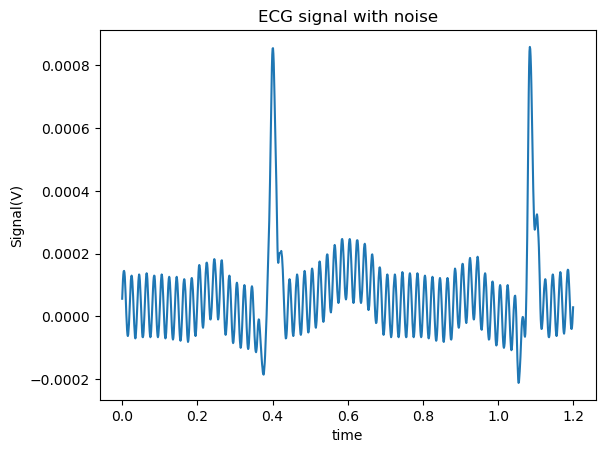

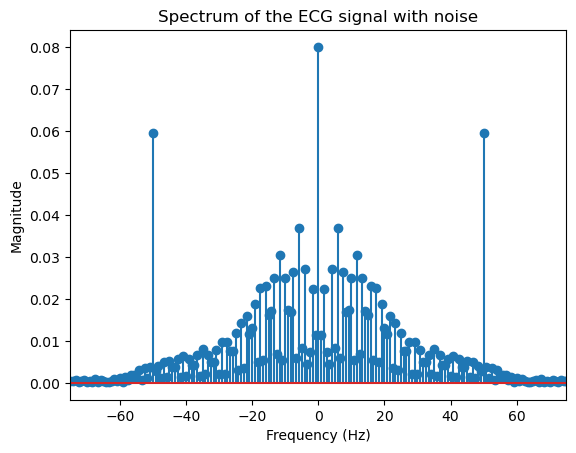

[ 1.         -1.80700738  0.9025    ]
[ 0.97553966 -1.8555867   0.97553966]
0.9755396613681641


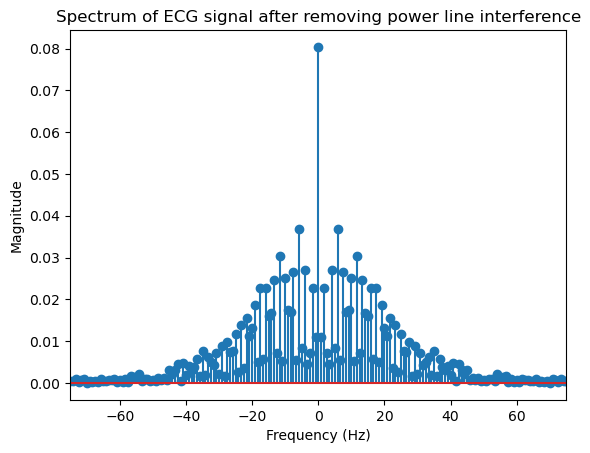

[ 1.         -0.99560177]
[ 0.99780089 -0.99780089]
0.9978008851424871


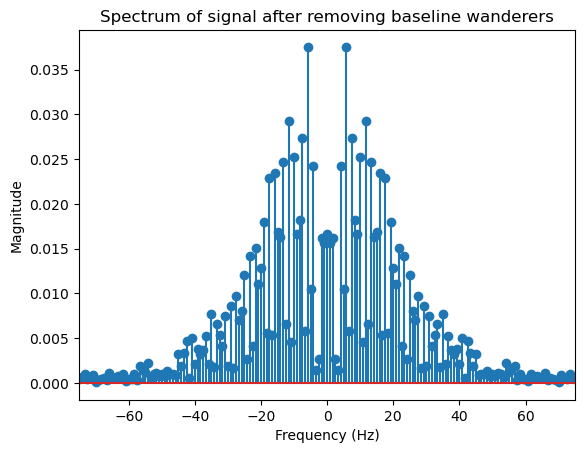

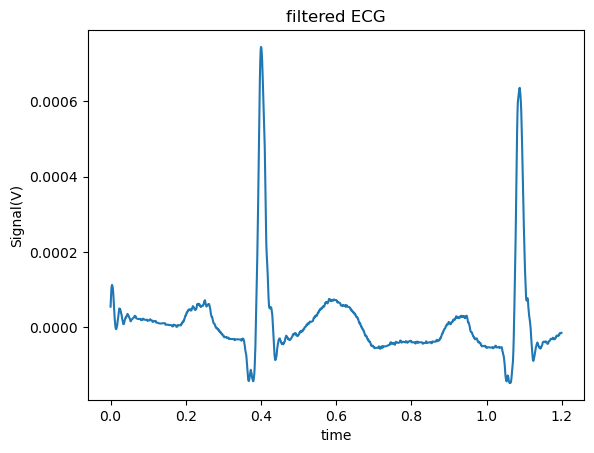

In [5]:
#using digital filters final

from scipy import signal
import pandas as pd
import numpy as np

Fs = 1000  # sampling rate
t = np.arange(0, 1.2, 1/Fs)  # time vector
f = 50  # frequency of the 50 Hz component

# Read the signal from the CSV file
df = pd.read_csv('samples.csv')
#signal1 = df["'I'"][1:].values
signal1 = df["'III'"][1:].to_numpy()#set the coumn to be read from the CSV
signal1 = signal1.astype(np.float64)
signal1=signal1/1000000  #convert to volts
signal1 = np.add(signal1 , 1*10**(-4)*np.sin(2*np.pi*f*t))#adding 50Hz noise to the signal

# Plot the signal
import matplotlib.pyplot as plt
plt.plot(t,signal1)
plt.ylabel("Signal(V)")
plt.xlabel("time")
plt.title("ECG signal with noise")
plt.show()

#signal1 = 5*np.sin(2*np.pi*f*t) +5*np.sin(2*np.pi*0.1*t)+ 2*np.random.randn(len(t))

# Take the DFT of the signal
freq = np.fft.fftfreq(len(signal1), 1/Fs)  # frequency bins
fft = np.fft.fft(signal1)  # DFT coefficients


# Plot the Fourier transform
plt.stem(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of the ECG signal with noise")
plt.xlim(-75,75)
plt.show()

#filtering out 50Hz signal(powerline interference)
r = 0.95
theta = np.pi*2*f/Fs
K=(1-2*r*np.cos(theta)+r*r)/(2-2*np.cos(theta))
b1=np.array([1,-2*np.cos(theta),1])
b1=b1*K
a1=np.array([1,-2*0.95*np.cos(theta),r*r])
print(a1)
print(b1)
print(K)
y1=signal.lfilter(b1,a1,signal1)

# Take the DFT of the signal
freq1 = np.fft.fftfreq(len(y1), 1/Fs)  # frequency bins
fft1 = np.fft.fft(y1)  # DFT coefficients
# Plot the Fourier transform
plt.stem(freq1, np.abs(fft1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of ECG signal after removing power line interference")
plt.xlim(-75,75)
plt.show()

#filtering baseline wanderers using a highpass filter
alpha = 1 - 2*0.7*np.pi/Fs
K = (1+alpha)/2
b2 = np.array([1,-1])
b2 = K*b2
a2 = np.array([1,-1*alpha])
y2=signal.lfilter(b2,a2,y1)
print(a2)
print(b2)
print(K)
# Take the DFT of the signal
freq2 = np.fft.fftfreq(len(y2), 1/Fs)  # frequency bins
fft2 = np.fft.fft(y2)  # DFT coefficients
# Plot the Fourier transform
plt.stem(freq2, np.abs(fft2))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Spectrum of signal after removing baseline wanderers")
plt.xlim(-75,75)
plt.show()

#plotting the filtered signal
plt.plot(t,y2)
plt.xlabel("time")
plt.ylabel("Signal(V)")
plt.title("filtered ECG")
plt.show()

#gui final
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import numpy as np

def create_plot(fig, position, title, data,xaxis,xlabel,ylabel,xlim):
    ax = fig.add_subplot(position)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(xlim[0],xlim[1])
    if(xlabel=="Frequency(Hz)"):
        ax.stem(xaxis,data)
    else:
        ax.plot(xaxis,data)

def guifunc():
    # Create the main window
    root = tk.Tk()
    root.title("Matplotlib Plots in Tkinter")

    # Create a tab control for the plots
    tab_control = ttk.Notebook(root)
    tab_control.pack(expand=1, fill="both")

    # Generate sample data for the plots

    # Create the plots
    for i, (title, data,xaxis,xlabel,ylabel,xlim) in enumerate(zip(["corrupted signal", "spectrum of corrupted signal", "Spectrum of ECG signal after removing power line interference", "Spectrum of signal after removing baseline wanderers", "Filtered signal"], [signal1, np.abs(fft), np.abs(fft1), np.abs(fft2), y2],[t,freq,freq1,freq2,t],["time(s)","Frequency(Hz)","Frequency(Hz)","Frequency(Hz)","time(s)"],["Signal(V)","Magnitude","Magnitude","Magnitude","Signal(V)"],[[0,1.2],[-75,75],[-75,75],[-75,75],[0,1.2]])):
        fig = Figure(figsize=(5, 5), dpi=100)
        create_plot(fig, 111, title, data,xaxis,xlabel,ylabel,xlim)

        # Create a new tab for the plot
        tab = ttk.Frame(tab_control)
        tab_control.add(tab, text=title)

        # Add the plot to the tab
        canvas = FigureCanvasTkAgg(fig, master=tab)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

    # Start the main loop
    root.mainloop()


guifunc()